# Introduction

The aim of this notebook is to identify causes of both employee attrition as well as retention

The Dataset

*   Features 1370 HR files with 35 descriptive and categorial variables of individual anonymous employees of a single undisclosed company

*  Includes metadata for each column in a separate documentation

* Is generally well structured, exhibiting no signs of artifacts or inconsistencies 

* Can be found on kaggle.com together with the original uploaders more ML driven EDA:

> https://www.kaggle.com/rischan/workshop-shopee-machine-learning-ann-scikitlearn



# Libraries and Setup

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Increase resolution of plots in the notebook

%config InlineBackend.figure_format = 'retina'

#Note that some of the more specialized libraries, f.i. sklearn and statsmodel
#are imported separatly as required in their respective code segments

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data Validation

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/data/HR-Employee-Attrition_train.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1366,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1367,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1368,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


## Checking for duplicates

In [ ]:
print(df.duplicated().sum())
df.duplicated(["EmployeeNumber"]).sum()#Especially important, because duplicates in UID indicate general issues with the dataset 

0


0

## Null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1370 non-null   int64 
 1   Attrition                 1370 non-null   object
 2   BusinessTravel            1370 non-null   object
 3   DailyRate                 1370 non-null   int64 
 4   Department                1370 non-null   object
 5   DistanceFromHome          1370 non-null   int64 
 6   Education                 1370 non-null   int64 
 7   EducationField            1370 non-null   object
 8   EmployeeCount             1370 non-null   int64 
 9   EmployeeNumber            1370 non-null   int64 
 10  EnvironmentSatisfaction   1370 non-null   int64 
 11  Gender                    1370 non-null   object
 12  HourlyRate                1370 non-null   int64 
 13  JobInvolvement            1370 non-null   int64 
 14  JobLevel                

No empty values, yay!

In [ ]:
df.isnull().sum(axis = 0) #source: https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

## and finally NAs

In [ ]:
df.isna().sum(axis=0)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No NAs too!

# Summary Statistics and Metadata

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1370.0,36.927737,9.163392,18.0,30.00,36.0,43.00,60.0
DailyRate,1370.0,803.920438,402.834234,102.0,465.00,806.5,1156.00,1499.0
DistanceFromHome,1370.0,9.260584,8.135717,1.0,2.00,7.0,14.00,29.0
Education,1370.0,2.918978,1.022753,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1370.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1370.0,1022.665693,602.960439,1.0,484.25,1016.5,1554.75,2068.0
EnvironmentSatisfaction,1370.0,2.728467,1.097507,1.0,2.00,3.0,4.00,4.0
HourlyRate,1370.0,65.845255,20.308706,30.0,48.00,66.0,83.00,100.0
JobInvolvement,1370.0,2.723358,0.719220,1.0,2.00,3.0,3.00,4.0
JobLevel,1370.0,2.067153,1.110354,1.0,1.00,2.0,3.00,5.0


Meta Data:
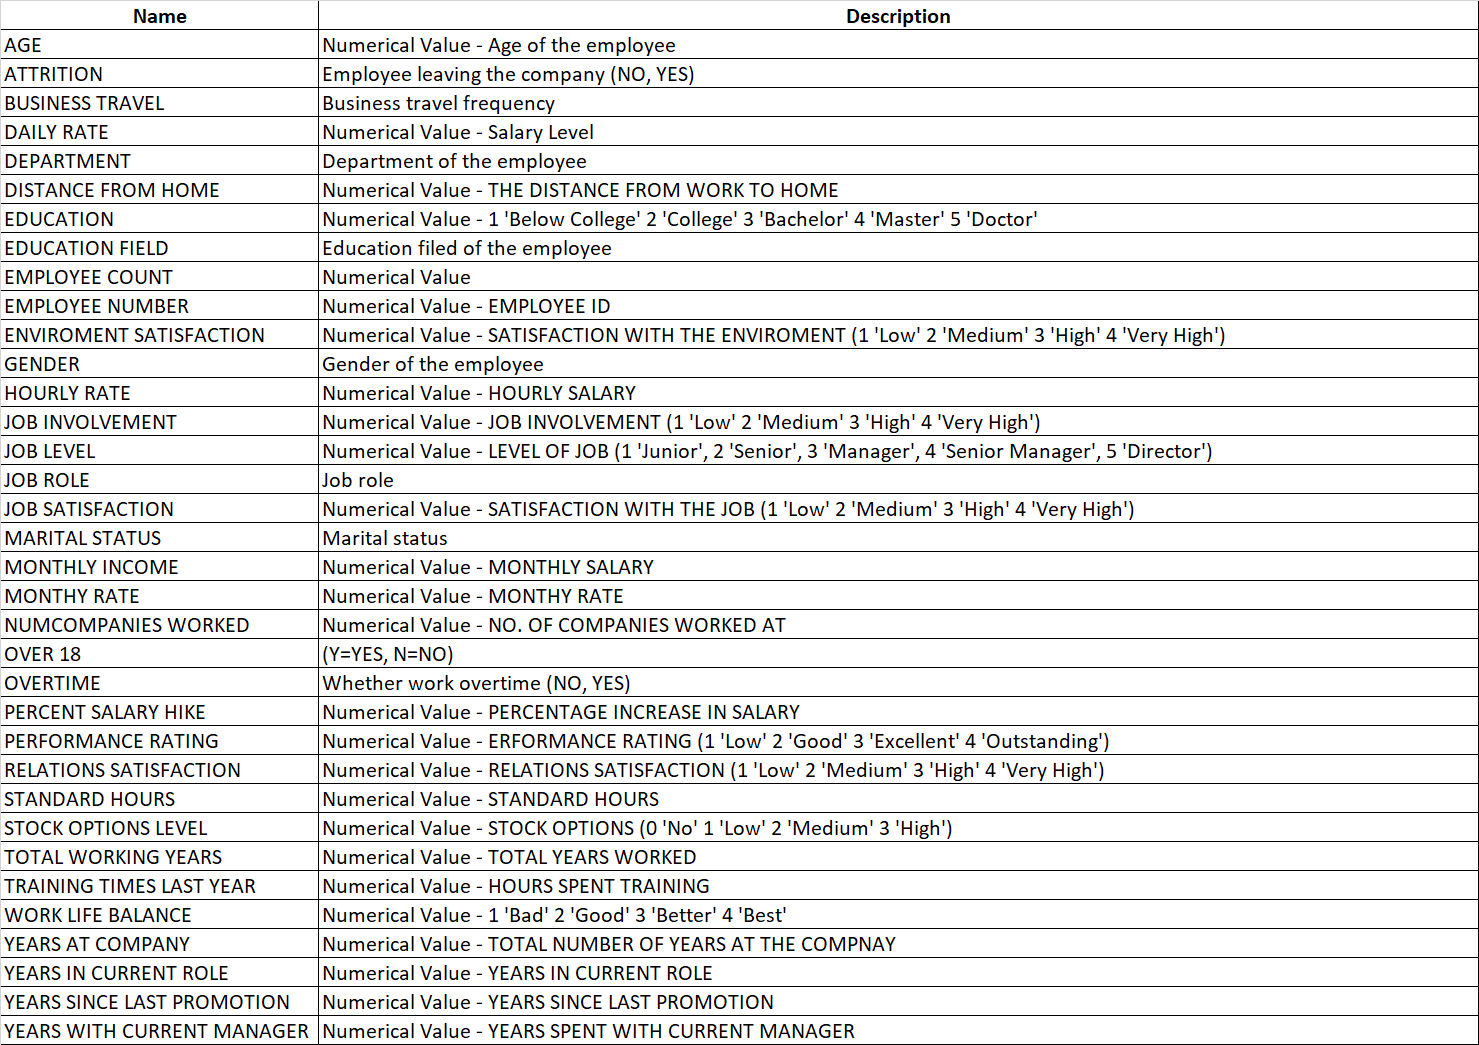

Source: https://www.kaggle.com/rischan/sample-code-shopee-workshop

# Data Processing

Creating a new dataframe for analysis by transforming all categorial variables into quantitative dummies 

In [ ]:
df_mod = pd.get_dummies(df.copy())
df_mod #For quantitative Analysis
df_mod_plot = df.copy() #For plotting eda results
df_mod_plot["Attrition_Y"] = df_mod["Attrition_Yes"] #Adding numeric data for attrition to the df with objects
#As an example, this enables me to include the share of churn in my seaborn plots later on
###Some more specific transformations are performed near the methods that require them
df_mod_plot

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Y
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,0
1366,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,0
1367,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,0
1368,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,0


Finding candidates for removal(No variance, trivially collinear etc.)

In [ ]:
df_mod.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1370.0,36.927737,9.163392,18.0,30.00,36.0,43.00,60.0
DailyRate,1370.0,803.920438,402.834234,102.0,465.00,806.5,1156.00,1499.0
DistanceFromHome,1370.0,9.260584,8.135717,1.0,2.00,7.0,14.00,29.0
Education,1370.0,2.918978,1.022753,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1370.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1370.0,1022.665693,602.960439,1.0,484.25,1016.5,1554.75,2068.0
EnvironmentSatisfaction,1370.0,2.728467,1.097507,1.0,2.00,3.0,4.00,4.0
HourlyRate,1370.0,65.845255,20.308706,30.0,48.00,66.0,83.00,100.0
JobInvolvement,1370.0,2.723358,0.719220,1.0,2.00,3.0,3.00,4.0
JobLevel,1370.0,2.067153,1.110354,1.0,1.00,2.0,3.00,5.0


In [ ]:
#Drop bc Variance: EmployeeCount, StandardHours, Over18_Y
#Drop bc Collinear: Overtime_No, Gender_Female, Attrition_No
df_mod = df_mod.drop(["EmployeeCount","StandardHours","Over18_Y","OverTime_No","Gender_Female","Attrition_No"], axis=1)
df_mod

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,36,884,23,2,2061,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0
1366,39,613,6,1,2062,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1367,27,155,4,3,2064,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1368,49,1023,2,3,2065,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


## Latex Output 

This was done to enable me to quickly include formated tables in my Powerpoint presentation using IguanaTex:

http://www.jonathanleroux.org/software/iguanatex/

Note that this requires the package ***booktabs*** to be installed in your Tex environment

In [ ]:
print('\\usepackage{booktabs}')
print(df_mod.describe().iloc[:,0:10].drop(['count','25%','50%',"75%","min","max"]).T.round(1).to_latex())

print('\\usepackage{booktabs}')
print(df_mod.describe().iloc[:,0:15].drop(['count','25%','50%',"75%","min","max"]).T.round(1).to_latex())


print('\\usepackage{booktabs}')
print(df_mod.describe().iloc[:,0:15].drop(['count','25%',"75%","min","max"]).T.round(1).to_latex())

print('\\usepackage{booktabs}')
print(df_mod.describe().iloc[:,15:30].drop(['count','25%',"75%","min","max"]).T.round(1).to_latex())


print('\\usepackage{booktabs}')
print(df_mod.describe().drop(['count','25%',"75%"]).T.round(1).to_latex())

\usepackage{booktabs}
\begin{tabular}{lrr}
\toprule
{} &    mean &    std \\
\midrule
Age                     &    36.9 &    9.2 \\
DailyRate               &   803.9 &  402.8 \\
DistanceFromHome        &     9.3 &    8.1 \\
Education               &     2.9 &    1.0 \\
EmployeeNumber          &  1022.7 &  603.0 \\
EnvironmentSatisfaction &     2.7 &    1.1 \\
HourlyRate              &    65.8 &   20.3 \\
JobInvolvement          &     2.7 &    0.7 \\
JobLevel                &     2.1 &    1.1 \\
JobSatisfaction         &     2.7 &    1.1 \\
\bottomrule
\end{tabular}

\usepackage{booktabs}
\begin{tabular}{lrr}
\toprule
{} &     mean &     std \\
\midrule
Age                     &     36.9 &     9.2 \\
DailyRate               &    803.9 &   402.8 \\
DistanceFromHome        &      9.3 &     8.1 \\
Education               &      2.9 &     1.0 \\
EmployeeNumber          &   1022.7 &   603.0 \\
EnvironmentSatisfaction &      2.7 &     1.1 \\
HourlyRate              &     65.8 &    20.3 \\
Job

# Visual Exploration of the Dataset

Note that my original EDA included a much larger set of plots

For the sake of clarity and conciseness I chose to only include those with clear and informative results similar to my approach in the Powerpoint presentation 

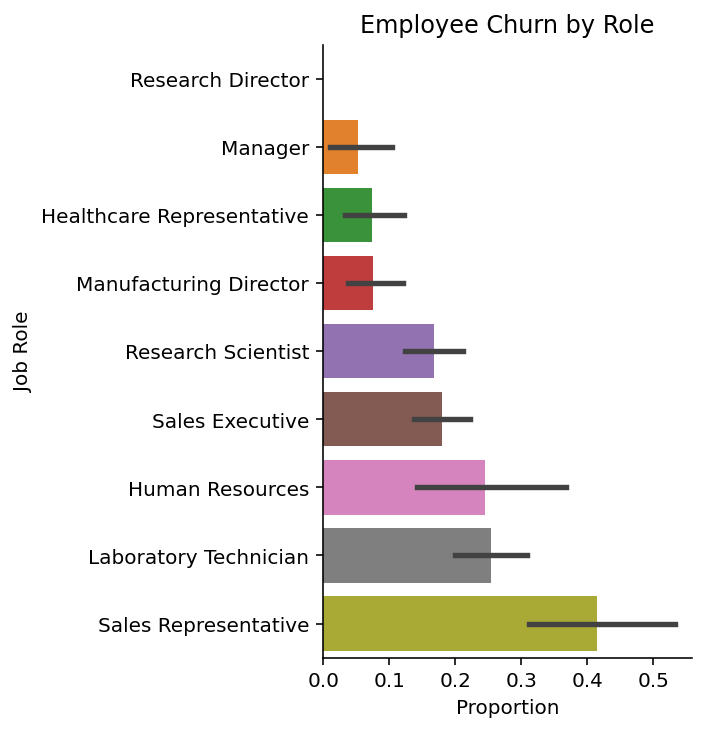

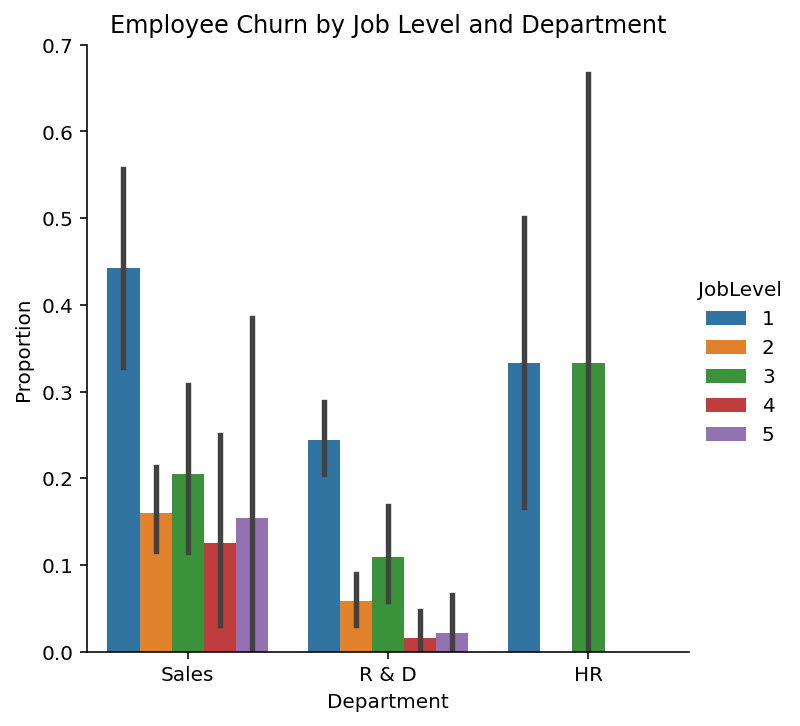

In [ ]:
labels=['Sales','R & D','HR']


#####By JobRole

list_job_role = ["Sales Representative","Laboratory Technician","Human Resources","Sales Executive","Research Scientist","Manufacturing Director","Healthcare Representative","Manager","Research Director"]

list_job_role.reverse()

p = sns.catplot(data=df_mod_plot, x='Attrition_Y', y='JobRole', kind='bar',order=list_job_role)#

p.set(ylabel='Job Role', xlabel='Proportion', title='Employee Churn by Role')


#####By Department and Joblevel
p = sns.catplot(data=df_mod_plot, x='Department', y='Attrition_Y',hue='JobLevel', kind='bar')

p.set(ylabel='Proportion', xlabel='Department', title='Employee Churn by Job Level and Department')

p.set_xticklabels(labels=labels)



* Junior employees have the highest churn rates but outward facing departments generally face increased attrition

([<matplotlib.axis.XTick at 0x7fca02f9d050>,
 [Text(0, 0, '0'), Text(1, 0, '5'), Text(2, 0, '10'), Text(3, 0, '15')])

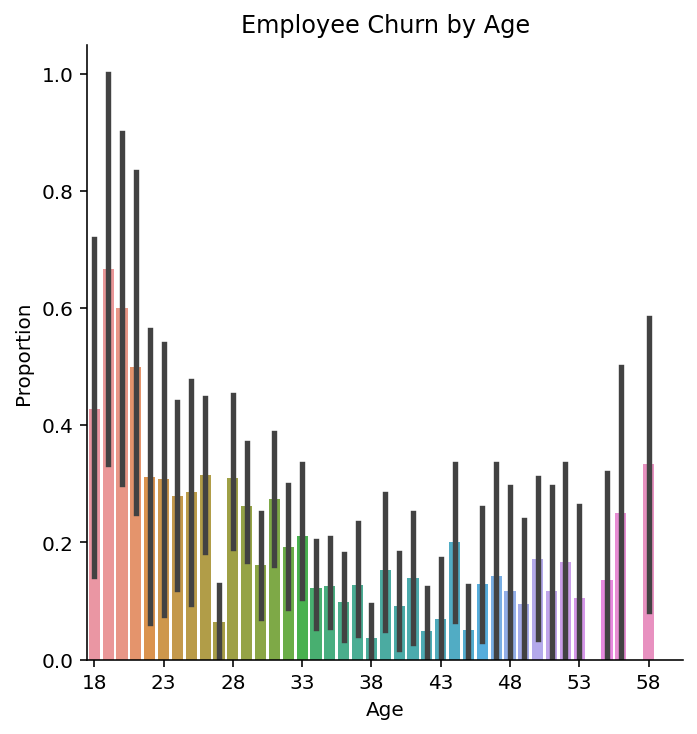

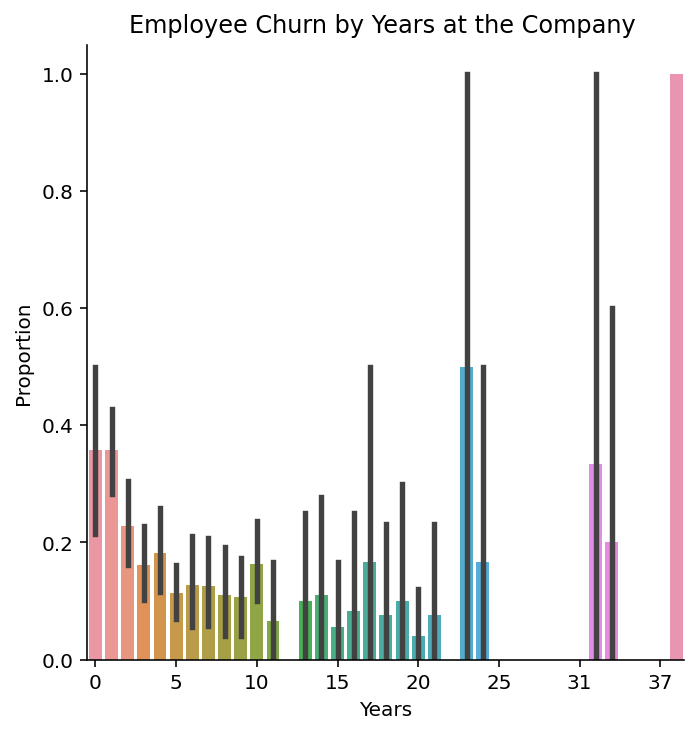

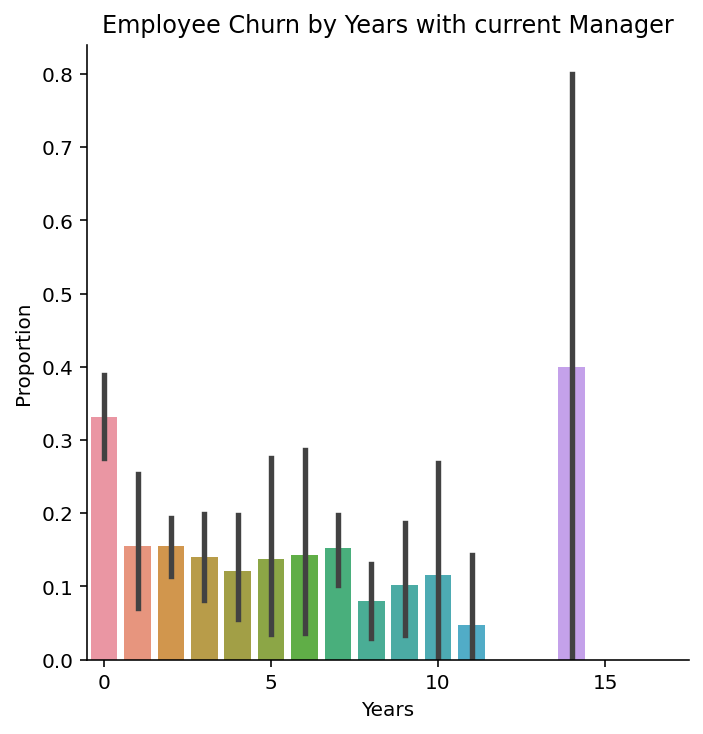

In [ ]:
#####By Age 

p = sns.catplot(data=df_mod_plot, x='Age', y='Attrition_Y', kind='bar')

p.set(ylabel='Proportion', xlabel='Age', title='Employee Churn by Age')

p_ticks, p_tick_label = plt.xticks() 
####reads the current set of ticks and ticklabels
####which enables me to process and prune them in the next step:
plt.xticks(p_ticks[::5],p_tick_label[::5])



#####By Years at Company

p = sns.catplot(data=df_mod_plot, x='YearsAtCompany', y='Attrition_Y', kind='bar')

p.set(ylabel='Proportion', xlabel='Years', title='Employee Churn by Years at the Company ')

p_ticks, p_tick_label = plt.xticks()

plt.xticks(p_ticks[::5],p_tick_label[::5])

#p.set_xticklabels([""])#useful to supress labels

#####By Department and current Manager 
p = sns.catplot(data=df_mod_plot, x='YearsWithCurrManager', y='Attrition_Y', kind='bar')

p.set(ylabel='Proportion', xlabel='Years', title='Employee Churn by Years with current Manager')

p_ticks, p_tick_label = plt.xticks() #Useful for plotting ticks and labels

plt.xticks(p_ticks[::5],p_tick_label[::5])


* Plot 1 shows a relative decrease in churn by age until early retirement age

* But plot 2 strongly indicates a company pension scheme

* Lastly plot 3 highlights the effect of consistent team and management structures to reduce attrition

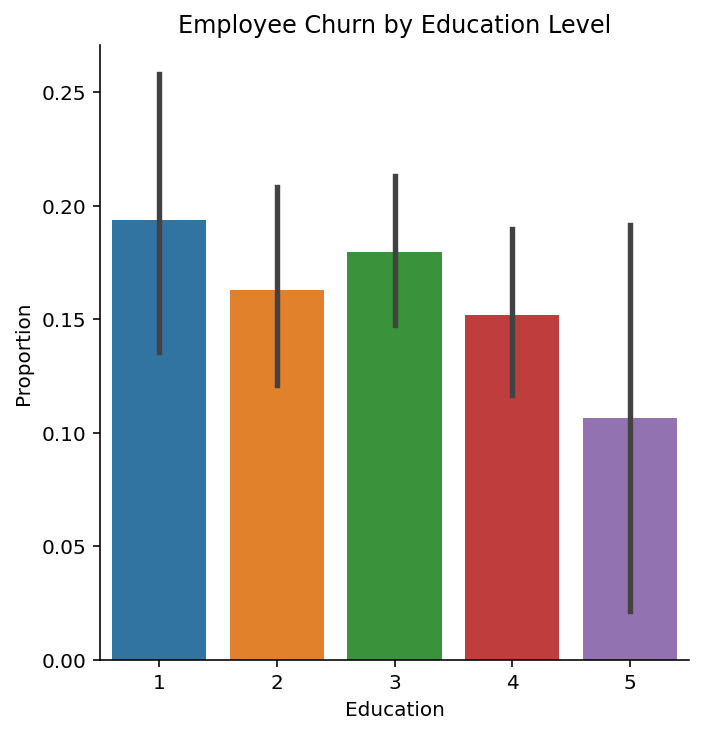

In [ ]:
#####By Education
p = sns.catplot(data=df_mod_plot, x='Education', y='Attrition_Y', kind='bar')

p.set(ylabel='Proportion', xlabel='Education', title='Employee Churn by Education Level')

* While the churn rate decreases in education level

* Our confidence intervals increase as the sample sizes for each additional degree grow smaller

([<matplotlib.axis.XTick at 0x7fca02e08b10>,
 [Text(0, 0, '1'),
  Text(0, 0, '6'),
  Text(0, 0, '11'),
  Text(0, 0, '16'),
  Text(0, 0, '21'),
  Text(0, 0, '26')])

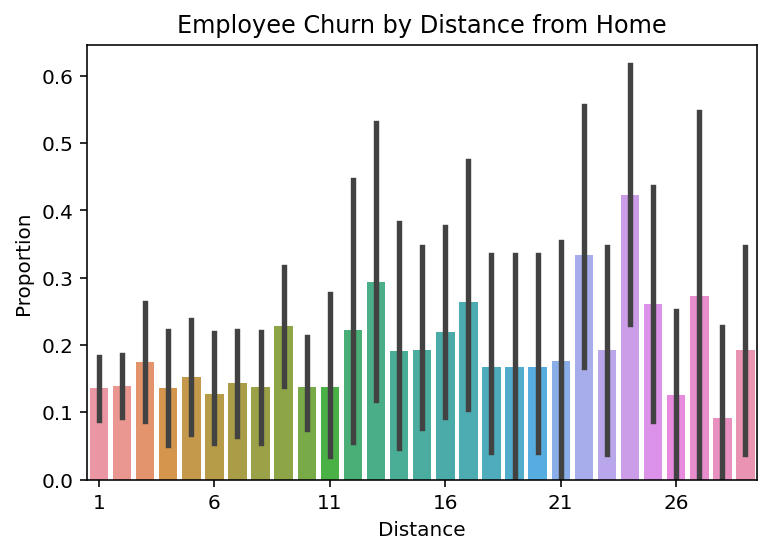

In [ ]:
#####By distance from home
p = sns.barplot(data=df_mod_plot, x='DistanceFromHome', y='Attrition_Y')
p.set(ylabel='Proportion', xlabel='Distance', title='Employee Churn by Distance from Home')
p_ticks, p_tick_label = plt.xticks() #Useful for plotting ticks and labels

plt.xticks(p_ticks[::5],p_tick_label[::5])


* Churn increases slightly in distance

* Regular peaks indicate changes in mode of travel, type of road and geographical features

* But variance explodes as sample sizes decrease

I did not use the following plot during the presentation,
mainly because even with the auto scaling features of histplot the distribution rendered below demonstrates quite well that we need to take a multivariate approach:

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Monthly Income'),
 Text(0.5, 1.0, 'Employee Churn by Monthly Income')]

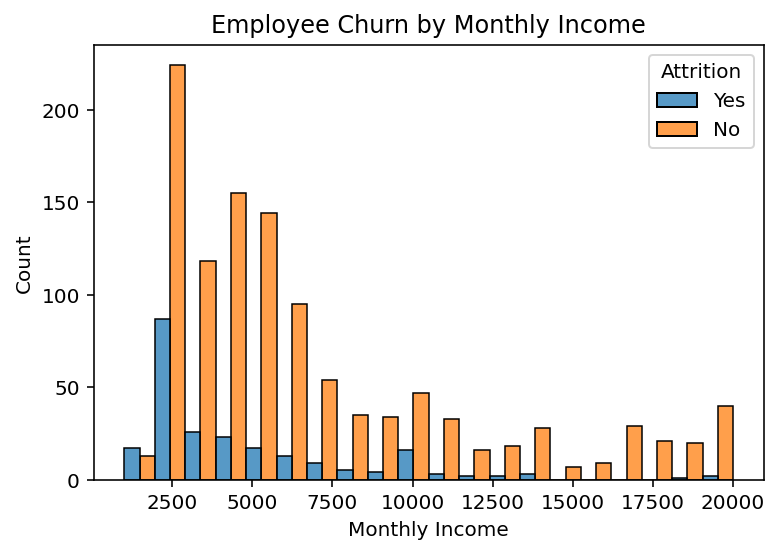

In [ ]:
p = sns.histplot(data=df_mod_plot, x='MonthlyIncome', hue='Attrition',multiple="dodge")
p.set(ylabel='Count', xlabel='Monthly Income', title='Employee Churn by Monthly Income')

As we can clearly see below, scatterplots are not informative with a dataset of this size


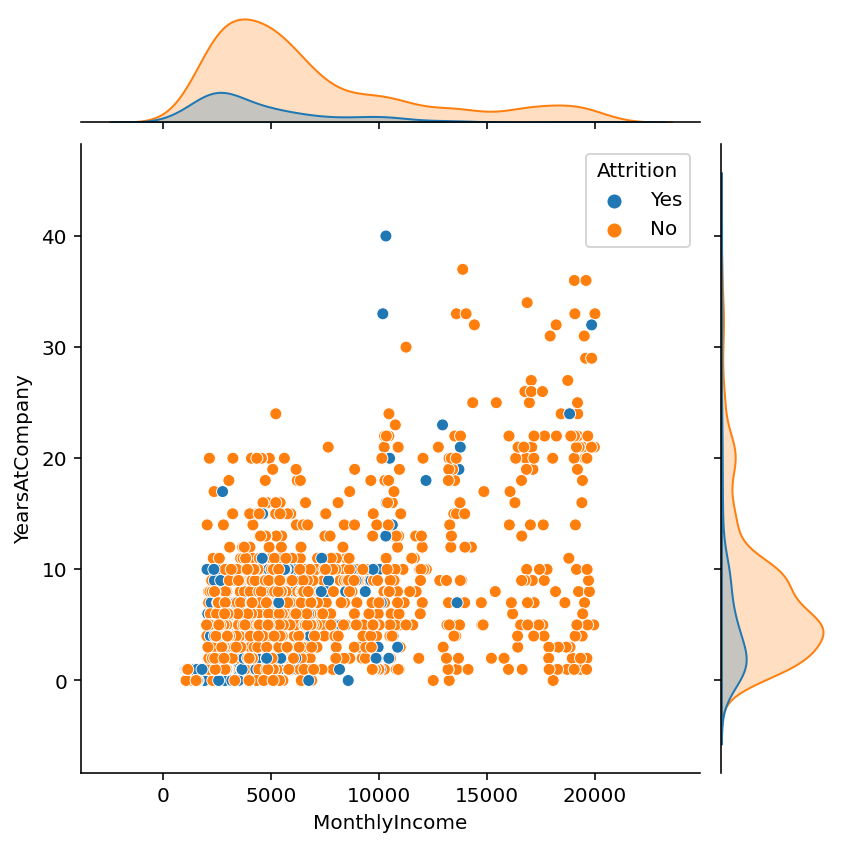

In [ ]:
sns.jointplot(data=df, x='MonthlyIncome', y='YearsAtCompany', hue='Attrition')

Kernel density estimation on the other hand enables us to gain more insight into the underlying dynamics

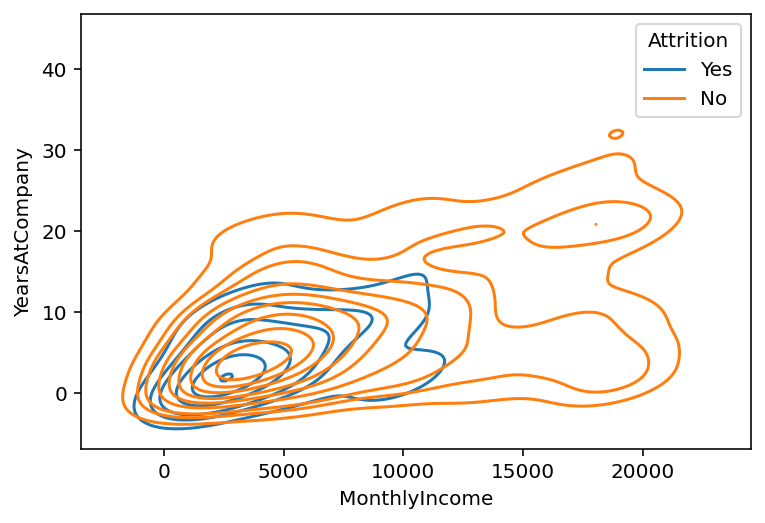

In [ ]:
sns.kdeplot(data=df, x='MonthlyIncome', y='YearsAtCompany', hue='Attrition')

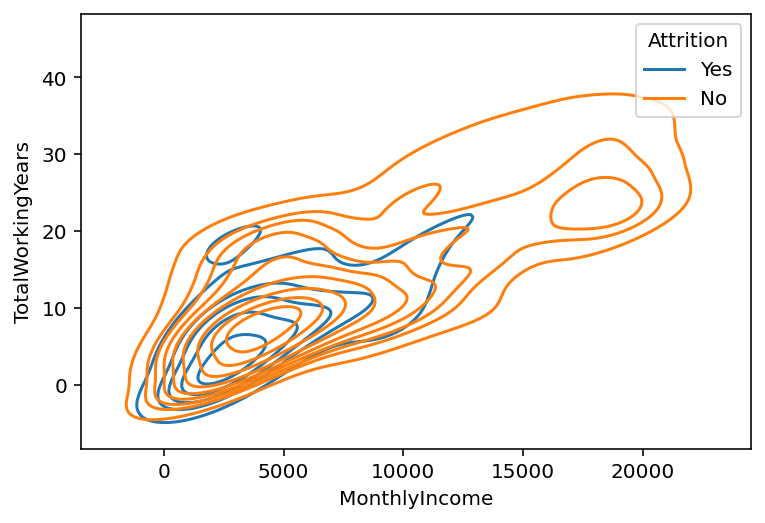

In [ ]:
sns.kdeplot(data=df, x='MonthlyIncome', y='TotalWorkingYears', hue='Attrition')

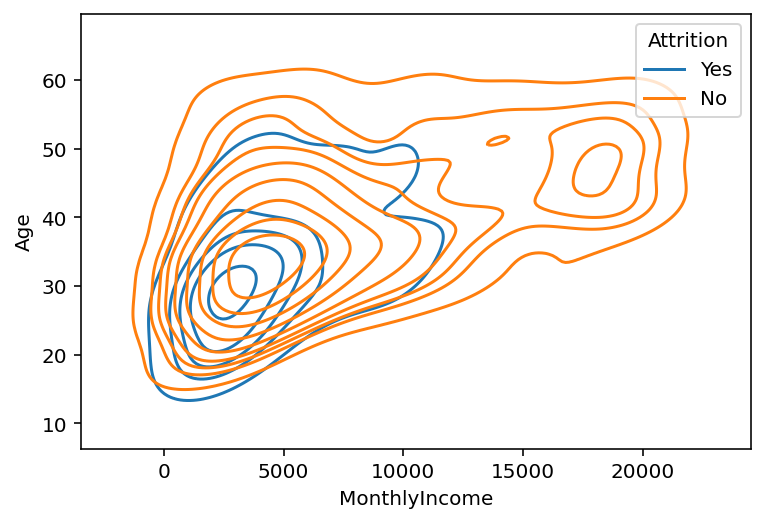

In [ ]:
sns.kdeplot(data=df, x='MonthlyIncome', y='Age', hue='Attrition')

* Employees are less likely or willing to churn as age or time at the company increases

* But attrition is still far more likely if income is on the lower end of the age~pay scale

* But variance explodes as sample sizes decrease


# Correlation Analysis

,Attrition,Age,JobLevel,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,MaritalStatus_Single,OverTime_Yes
Attrition,1.00,-0.18,-0.20,-0.21,-0.21,-0.20,-0.19,-0.18,0.18,0.24
OverTime_Yes,0.24,0.02,-0.01,0.00,-0.00,-0.03,-0.03,-0.03,-0.02,1.00
MaritalStatus_Single,0.18,-0.12,-0.09,-0.10,-0.11,-0.09,-0.09,-0.06,1.00,-0.02
Age,-0.18,1.00,0.50,0.48,0.66,0.26,0.20,0.20,-0.12,0.02
YearsWithCurrManager,-0.18,0.20,0.36,0.36,0.50,0.84,0.72,1.00,-0.06,-0.03
YearsInCurrentRole,-0.19,0.20,0.39,0.39,0.49,0.85,1.00,0.72,-0.09,-0.03
JobLevel,-0.20,0.50,1.00,0.92,0.74,0.47,0.39,0.36,-0.09,-0.01
YearsAtCompany,-0.20,0.26,0.47,0.46,0.59,1.00,0.85,0.84,-0.09,-0.03
MonthlyIncome,-0.21,0.48,0.92,1.00,0.71,0.46,0.39,0.36,-0.10,0.00
TotalWorkingYears,-0.21,0.66,0.74,0.71,1.00,0.59,0.49,0.50,-0.11,-0.00


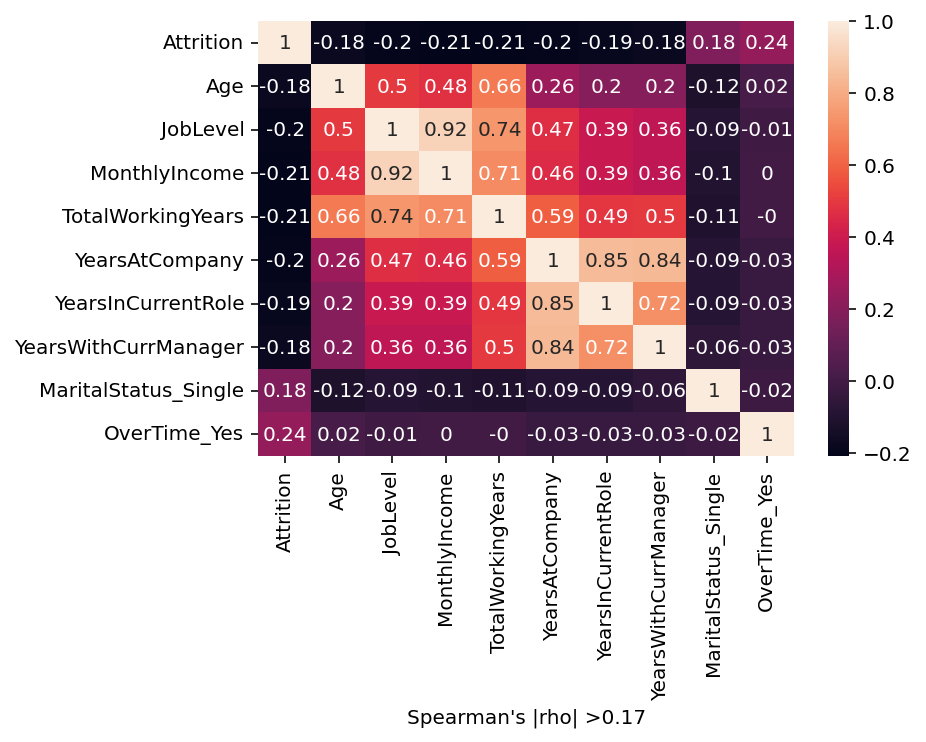

In [ ]:

#The following part is just to rearrange the variables for the correlogram 

df_mod_corr = df_mod.copy()

corr_buff = df_mod_corr.pop('Attrition_Yes')

df_mod_corr.insert(0,'Attrition', corr_buff)

corr_map = pd.DataFrame(df_mod_corr.corr(method="spearman"))

####Filtering the results to only include the top 10 factors by correlation
corr_map = corr_map.loc[(corr_map.Attrition < -0.17) | (corr_map.Attrition > 0.17) ].T.loc[(corr_map.Attrition < -0.17) | (corr_map.Attrition > 0.17) ].round(2)##This is a dirty hack to prune the correlation matrix

p = sns.heatmap(corr_map, annot=True)
p.set(xlabel='Spearman\'s |rho| >0.17')
####The table of the top 10 factors for employee attrition
corr_map.sort_values(by='Attrition', ascending = False).round(2)

* Overtime has the strongest impact

* But generally, factors associated with youth and mobility, like unmarried, low job level etc. also noteworthy

* However, both soft, like consistency and hard factors, like payment in the top 10 causes

# Predictive Models and Advanced Techniques

## Challenges

* High dimensionality hampers intuitive and more hands-on approaches

* Endogeneity, cross-interactions and causality likely to cause issues and require additional care in analysis

* The dataset is heavily imbalanced with only 16.8% of observations churning

* Some more advanced ML algorithms require additional transformation of the data

* Part of the data-set needs to be split off to test models to avoid biased in sample predictions

## Principal Components Analysis

Enables us to visualize high dimensional data while maintaining a significant share of the original variance

Explained variation per principal component: [0.10702367 0.06994584]


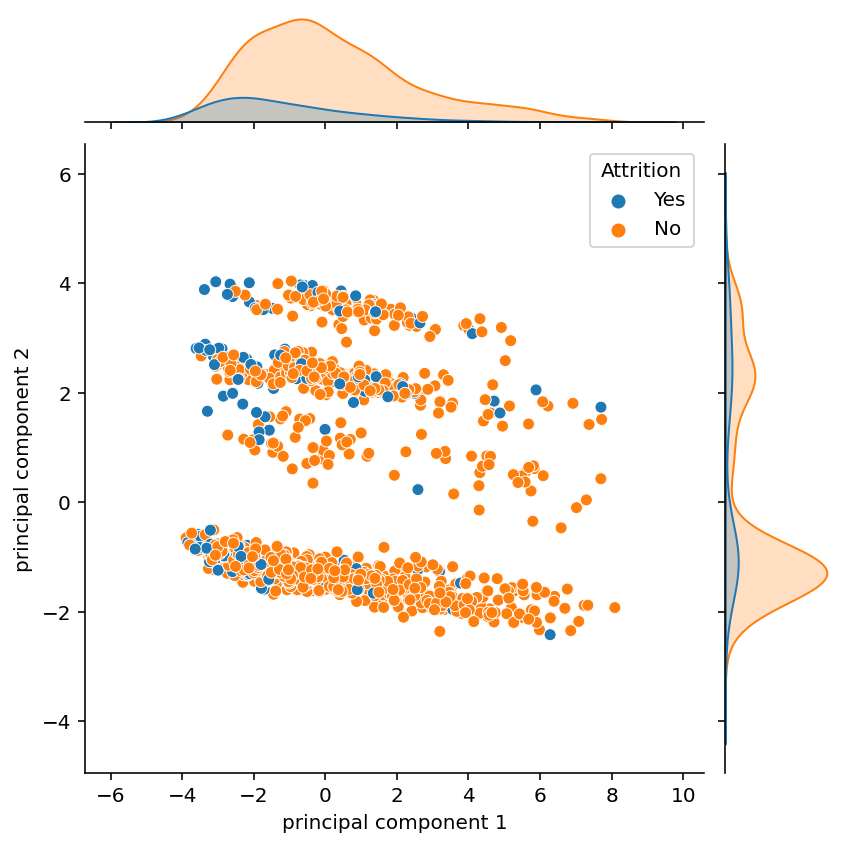

In [ ]:
from sklearn.preprocessing import StandardScaler  

x = StandardScaler().fit_transform(df_mod.drop(['Attrition_Yes'],axis=1)) #dropping attrition because it is the variable under investigation

df_stand = pd.DataFrame(x,columns = df_mod.drop(['Attrition_Yes'],axis=1).columns)


from sklearn.decomposition import PCA #Tutorial can be found here: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
pca_at = PCA(n_components=2)
principalComponents_at = pca_at.fit_transform(df_stand)

df_pca = pd.DataFrame(data = principalComponents_at
             , columns = ['principal component 1', 'principal component 2'])
print('Explained variation per principal component: {}'.format(pca_at.explained_variance_ratio_))

df_agg = pd.concat([df_pca,df], axis = 1)

sns.jointplot(data=df_agg, x='principal component 1', y='principal component 2', hue='Attrition')

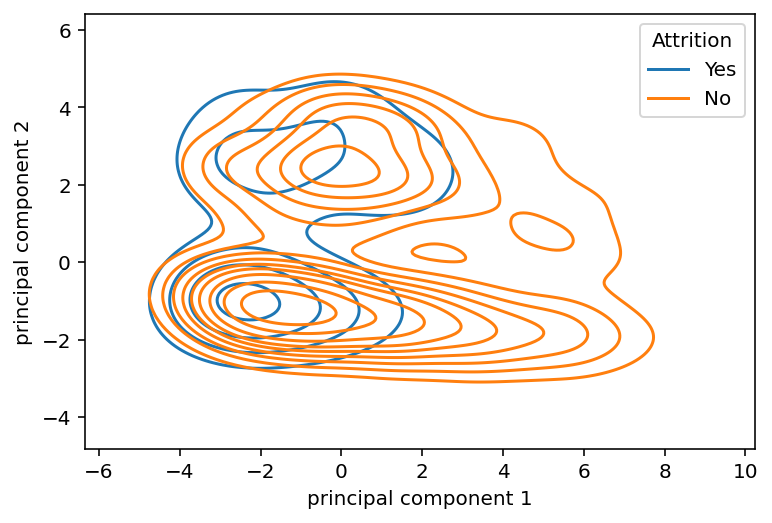

In [ ]:
sns.kdeplot(data=df_agg, x='principal component 1', y='principal component 2', hue='Attrition')

While this graph only shows 17% of the total variance we can observe a strong relationship between the aggregate variables and employee attrition.

Especially the separation of the means as well as variances is quite indicative of the additional value of more complex approaches

## Linear Model

### Model Selection

Note that some of the methods employed here are not necessarily best pratice but should be regarded as a proof of concept or mockup

Lets drop some further variables to enable us to analyze the relationships using OLS:

In [ ]:
df_reg = df_mod.drop(['Age', 'DailyRate', 'MonthlyRate', 'BusinessTravel_Non-Travel','Department_Human Resources', 'EducationField_Other', 'JobRole_Research Director', 'MaritalStatus_Single'], axis = 1)

In [ ]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   DistanceFromHome                   1370 non-null   int64
 1   Education                          1370 non-null   int64
 2   EmployeeNumber                     1370 non-null   int64
 3   EnvironmentSatisfaction            1370 non-null   int64
 4   HourlyRate                         1370 non-null   int64
 5   JobInvolvement                     1370 non-null   int64
 6   JobLevel                           1370 non-null   int64
 7   JobSatisfaction                    1370 non-null   int64
 8   MonthlyIncome                      1370 non-null   int64
 9   NumCompaniesWorked                 1370 non-null   int64
 10  PercentSalaryHike                  1370 non-null   int64
 11  PerformanceRating                  1370 non-null   int64
 12  RelationshipSatisfac

In [ ]:
import statsmodels.api as sm 

X = df_reg.drop(['Attrition_Yes'], axis = 1)
X = sm.add_constant(X)
y = df_reg['Attrition_Yes']


model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model
#Note that I do not compare the individual models with each other in this notebook
#But I plan on using this dataset for further analysis and study later on....

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Attrition_Yes   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     11.22
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           1.02e-61
Time:                        17:20:37   Log-Likelihood:                -387.48
No. Observations:                1370   AIC:                             861.0
Df Residuals:                    1327   BIC:                             1086.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                 0.4046      0.202      2.003      0.045       0.008       0.801
DistanceFromHome                      0.0038      0.001      3.475      0.001       0.002       0.006
Education                            -0.0026      0.009     -0.290      0.772      -0.020       0.015
EmployeeNumber                    -3.189e-06   1.49e-05     -0.214      0.830   -3.24e-05     2.6e-05
EnvironmentSatisfaction              -0.0440      0.008     -5.386      0.000      -0.060      -0.028
HourlyRate                           -0.0001      0.000     -0.322      0.747      -0.001       0.001
JobInvolvement                       -0.0609      0.012     -4.881      0.000      -0.085      -0.036
JobLevel                             -0.0142      0.030     -0.473      0.636      -0.073       0.045
JobSatisfaction                      -0.0382      0.008     -4.716      0.000      -0.054      -0.022
MonthlyIncome                      3.024e-06   8.03e-06      0.377      0.706   -1.27e-05    1.88e-05
NumCompaniesWorked                    0.0172      0.004      4.369      0.000       0.009       0.025
PercentSalaryHike                    -0.0030      0.004     -0.782      0.434      -0.011       0.005
PerformanceRating                     0.0199      0.039      0.507      0.612      -0.057       0.097
RelationshipSatisfaction             -0.0249      0.008     -3.015      0.003      -0.041      -0.009
StockOptionLevel                     -0.0144      0.014     -0.997      0.319      -0.043       0.014
TotalWorkingYears                    -0.0066      0.002     -2.989      0.003      -0.011      -0.002
TrainingTimesLastYear                -0.0145      0.007     -2.095      0.036      -0.028      -0.001
WorkLifeBalance                      -0.0275      0.013     -2.156      0.031      -0.053      -0.002
YearsAtCompany                        0.0064      0.003      2.038      0.042       0.000       0.013
YearsInCurrentRole                   -0.0099      0.004     -2.471      0.014      -0.018      -0.002
YearsSinceLastPromotion               0.0094      0.004      2.613      0.009       0.002       0.016
YearsWithCurrManager                 -0.0090      0.004     -2.153      0.032      -0.017      -0.001
BusinessTravel_Travel_Frequently      0.1594      0.035      4.585      0.000       0.091       0.228
BusinessTravel_Travel_Rarely          0.0680      0.030      2.258      0.024       0.009       0.127
Department_Research & Development     0.1593      0.126      1.264      0.207      -0.088       0.407
Department_Sales                      0.1215      0.130      0.936      0.349      -0.133       0.376
EducationField_Human Resources        0.1684      0.094      1.791      0.074      -0.016       0.353
EducationField_Life Sci

Let's drop another round:

### Final Model

In [ ]:
df_reg2 = df_reg.drop([ 'Education', 'EmployeeNumber', 'JobLevel',
                       'EducationField_Medical', 'MonthlyIncome', 'HourlyRate', 
                       'PerformanceRating','JobRole_Healthcare Representative',
                       'EducationField_Life Sciences','PercentSalaryHike',
                       'JobRole_Manufacturing Director', 'Department_Sales', 'Department_Research & Development',
                       'JobRole_Manager', 'StockOptionLevel', 'JobRole_Research Scientist', 
                       'JobRole_Human Resources', 'EducationField_Marketing'], axis = 1)

X = df_reg2.drop(['Attrition_Yes'], axis = 1)
X = sm.add_constant(X)
y = df_reg2['Attrition_Yes']

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

#latex export
print('\\usepackage{booktabs}')

print((model.summary2().tables[1]).to_latex())
# Print out the statistics
model.summary()

\usepackage{booktabs}
\begin{tabular}{lrrrrrr}
\toprule
{} &     Coef. &  Std.Err. &          t &         P>|t| &    [0.025 &    0.975] \\
\midrule
const                            &  0.630008 &  0.076038 &   8.285384 &  2.815541e-16 &  0.480841 &  0.779174 \\
DistanceFromHome                 &  0.003640 &  0.001086 &   3.353038 &  8.215169e-04 &  0.001510 &  0.005770 \\
EnvironmentSatisfaction          & -0.043793 &  0.008052 &  -5.438676 &  6.368917e-08 & -0.059589 & -0.027997 \\
JobInvolvement                   & -0.061574 &  0.012326 &  -4.995474 &  6.639915e-07 & -0.085754 & -0.037394 \\
JobSatisfaction                  & -0.039277 &  0.008025 &  -4.894195 &  1.106373e-06 & -0.055020 & -0.023534 \\
NumCompaniesWorked               &  0.016831 &  0.003894 &   4.322628 &  1.655378e-05 &  0.009193 &  0.024469 \\
RelationshipSatisfaction         & -0.023538 &  0.008203 &  -2.869517 &  4.175263e-03 & -0.039629 & -0.007446 \\
TotalWorkingYears                & -0.007325 &  0.001630 &  -

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Attrition_Yes   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     19.31
Date:                Sun, 30 Jan 2022   Prob (F-statistic):           4.02e-70
Time:                        17:20:37   Log-Likelihood:                -392.90
No. Observations:                1370   AIC:                             835.8
Df Residuals:                    1345   BIC:                             966.4
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.6300      0.076      8.285      0.000       0.481       0.779
DistanceFromHome                     0.0036      0.001      3.353      0.001       0.002       0.006
EnvironmentSatisfaction             -0.0438      0.008     -5.439      0.000      -0.060      -0.028
JobInvolvement                      -0.0616      0.012     -4.995      0.000      -0.086      -0.037
JobSatisfaction                     -0.0393      0.008     -4.894      0.000      -0.055      -0.024
NumCompaniesWorked                   0.0168      0.004      4.323      0.000       0.009       0.024
RelationshipSatisfaction            -0.0235      0.008     -2.870      0.004      -0.040      -0.007
TotalWorkingYears                   -0.0073      0.002     -4.494      0.000      -0.011      -0.004
TrainingTimesLastYear               -0.0158      0.007     -2.308      0.021      -0.029      -0.002
WorkLifeBalance                     -0.0286      0.013     -2.259      0.024      -0.053      -0.004
YearsAtCompany                       0.0066      0.003      2.163      0.031       0.001       0.013
YearsInCurrentRole                  -0.0103      0.004     -2.604      0.009      -0.018      -0.003
YearsSinceLastPromotion              0.0098      0.004      2.774      0.006       0.003       0.017
YearsWithCurrManager                -0.0092      0.004     -2.243      0.025      -0.017      -0.001
BusinessTravel_Travel_Frequently     0.1647      0.034      4.779      0.000       0.097       0.232
BusinessTravel_Travel_Rarely         0.0726      0.030      2.433      0.015       0.014       0.131
EducationField_Human Resources       0.1626      0.065      2.482      0.013       0.034       0.291
EducationField_Technical Degree      0.0876      0.031      2.865      0.004       0.028       0.148
Gender_Male                          0.0412      0.018      2.270      0.023       0.006       0.077
JobRole_Laboratory Technician        0.1142      0.025      4.495      0.000       0.064       0.164
JobRole_Sales Executive              0.0675      0.023      2.986      0.003       0.023       0.112
JobRole_Sales Representative         0.2282      0.041      5.590      0.000       0.148       0.308
MaritalStatus_Divorced              -0.1508      0.025     -6.139      0.000      -0.199      -0.103
MaritalStatus_Married               -0.1248      0.021     -6.070      0.000      -0.165      -0.084
OverTime_Yes                         0.2121      0.020     10.774      0.000       0.173       0.251
==============================================================================
Omnibus:                      242.014   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              381.448
Skew:             


* Linear probabilities enable intuitive interpretation and explanation

  * For instance: male employees are 4% more likely to leave the company

* But consistent variance estimation is not possible

  * This can be alleviated by confirming the results with a correctly specified model in particular logit

* P-value driven exploration is therefore of doubtful benefit

* Can however still perform well if benchmarked

## Logit

This is used to validate the model found in the linear model section

It does not suffer from the same issues, namely heteroscedasticity and therefore inconsistent variance estimation, but is more subsceptible to collinearity as noted in the output below

### Basic Model

In [ ]:
#I removed some of the time related variables to reduce the amount of collinearity
model = sm.Logit(y, X.drop(['YearsAtCompany','YearsWithCurrManager'], axis = 1)).fit(cov_type="hc0")
#predictions = model.predict(X)

model.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1370
Model:                          Logit   Df Residuals:                     1347
Method:                           MLE   Df Model:                           22
Date:                Sun, 30 Jan 2022   Pseudo R-squ.:                     inf
Time:                        17:20:38   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:                  hc0   LLR p-value:                     1.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                2.2774      0.777      2.932      0.003       0.755       3.800
DistanceFromHome                     0.0450      0.010      4.433      0.000       0.025       0.065
EnvironmentSatisfaction             -0.4368      0.083     -5.268      0.000      -0.599      -0.274
JobInvolvement                      -0.5577      0.117     -4.771      0.000      -0.787      -0.329
JobSatisfaction                     -0.4120      0.083     -4.947      0.000      -0.575      -0.249
NumCompaniesWorked                   0.1726      0.037      4.718      0.000       0.101       0.244
RelationshipSatisfaction            -0.2687      0.086     -3.119      0.002      -0.438      -0.100
TotalWorkingYears                   -0.0941      0.024     -4.001      0.000      -0.140      -0.048
TrainingTimesLastYear               -0.2011      0.072     -2.788      0.005      -0.342      -0.060
WorkLifeBalance                     -0.3350      0.129     -2.596      0.009      -0.588      -0.082
YearsInCurrentRole                  -0.1399      0.037     -3.774      0.000      -0.213      -0.067
YearsSinceLastPromotion              0.1725      0.039      4.447      0.000       0.096       0.249
BusinessTravel_Travel_Frequently     1.9533      0.368      5.307      0.000       1.232       2.675
BusinessTravel_Travel_Rarely         1.0713      0.336      3.191      0.001       0.413       1.729
EducationField_Human Resources       1.6410      0.524      3.130      0.002       0.613       2.668
EducationField_Technical Degree      0.8354      0.273      3.058      0.002       0.300       1.371
Gender_Male                          0.4423      0.186      2.383      0.017       0.079       0.806
JobRole_Laboratory Technician        1.0385      0.227      4.575      0.000       0.594       1.483
JobRole_Sales Executive              0.7300      0.220      3.318      0.001       0.299       1.161
JobRole_Sales Representative         1.6675      0.329      5.065      0.000       1.022       2.313
MaritalStatus_Divorced              -1.5329      0.247     -6.201      0.000      -2.017      -1.048
MaritalStatus_Married               -1.1128      0.206     -5.395      0.000      -1.517      -0.709
OverTime_Yes                         1.9608      0.205      9.562      0.000       1.559       2.363
====================================================================================================
"""

### Standardized Model

The following steps are just preparation work to allow me to run standardized models later on.

In [ ]:
X = df_reg2.drop(['Attrition_Yes'], axis = 1)
X

,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,NumCompaniesWorked,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,EducationField_Technical Degree,Gender_Male,JobRole_Laboratory Technician,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,OverTime_Yes
0,1,2,3,4,8,1,8,0,1,6,4,0,5,0,1,0,0,0,0,1,0,0,0,1
1,8,3,2,2,1,4,10,3,3,10,7,1,7,1,0,0,0,1,0,0,0,0,1,0
2,2,4,2,3,6,2,7,3,3,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1
3,3,4,3,3,1,3,8,3,3,8,7,3,0,1,0,0,0,0,0,0,0,0,1,1
4,2,1,3,2,9,4,6,3,3,2,2,2,2,0,1,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,23,3,4,4,4,3,17,3,3,5,2,0,3,1,0,0,0,1,1,0,0,0,1,0
1366,6,4,2,1,4,1,9,5,3,7,7,1,7,0,1,0,0,1,0,0,0,0,1,0
1367,4,2,4,2,1,2,6,0,3,6,2,0,3,0,1,0,0,1,0,0,0,0,1,1
1368,2,4,2,2,2,4,17,3,2,9,6,0,8,1,0,0,0,1,0,1,0,0,1,0


In [ ]:
#This is separate to avoid repeatedly executing the code above
X = StandardScaler().fit_transform(X)


df_reg2

model = sm.Logit(y, X, axis = 1).fit()

model.summary()

Optimization terminated successfully.
         Current function value: 87.544833
         Iterations 5


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1370
Model:                          Logit   Df Residuals:                     1346
Method:                           MLE   Df Model:                           23
Date:                Sun, 30 Jan 2022   Pseudo R-squ.:                     inf
Time:                        17:20:38   Log-Likelihood:            -1.1994e+05
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1395      0.059      2.372      0.018       0.024       0.255
x2            -0.2260      0.059     -3.811      0.000      -0.342      -0.110
x3            -0.2100      0.060     -3.504      0.000      -0.328      -0.093
x4            -0.2031      0.059     -3.438      0.001      -0.319      -0.087
x5             0.1963      0.065      3.028      0.002       0.069       0.323
x6            -0.1186      0.059     -2.015      0.044      -0.234      -0.003
x7            -0.2700      0.087     -3.118      0.002      -0.440      -0.100
x8            -0.0954      0.059     -1.605      0.108      -0.212       0.021
x9            -0.0897      0.059     -1.522      0.128      -0.205       0.026
x10            0.1893      0.125      1.513      0.130      -0.056       0.435
x11           -0.1729      0.096     -1.799      0.072      -0.361       0.015
x12            0.1478      0.075      1.965      0.049       0.000       0.295
x13           -0.1514      0.097     -1.561      0.119      -0.342       0.039
x14            0.3029      0.091      3.333      0.001       0.125       0.481
x15            0.1543      0.091      1.697      0.090      -0.024       0.333
x16            0.1044      0.060      1.748      0.080      -0.013       0.221
x17            0.1222      0.060      2.051      0.040       0.005       0.239
x18            0.0955      0.059      1.612      0.107      -0.021       0.212
x19            0.1988      0.064      3.115      0.002       0.074       0.324
x20            0.1309      0.062      2.109      0.035       0.009       0.253
x21            0.2560      0.068      3.785      0.000       0.123       0.388
x22           -0.2986      0.069     -4.351      0.000      -0.433      -0.164
x23           -0.2961      0.068     -4.323      0.000      -0.430      -0.162
x24            0.4451      0.061      7.331      0.000       0.326       0.564
==============================================================================
"""

### Alternative SKlearn Approach

The same Logit model used in the standardized model subsection, but run using the sklearn library

In [ ]:
#####################sklearn approach, lacks insightful summaries but has a few tools to contrast and compare models KPIs
from sklearn.linear_model import LogisticRegression #Source: datacamp Tutorial: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python


logreg = LogisticRegression()

model = logreg.fit(df_stand,y)

model.coef_

array([[-0.27448905, -0.14628969,  0.38873894,  0.00413149, -0.07112775,
        -0.481789  ,  0.04859939, -0.38242594, -0.19168715, -0.44017944,
         0.00401618,  0.03891403,  0.49560479, -0.08551262,  0.03913086,
        -0.28384204, -0.13898085, -0.3727733 , -0.23913972, -0.22906178,
         0.5603596 , -0.58237047,  0.50338585, -0.43918067, -0.3282497 ,
         0.31907979, -0.05834995, -0.31191138,  0.07356099,  0.06140838,
         0.08265446, -0.07976397,  0.08027214, -0.09659897, -0.04600293,
         0.20081301,  0.22310749, -0.17253548,  0.41721154,  0.29180983,
        -0.0482809 , -0.06246283, -0.97397176, -0.07429526,  0.16693671,
         0.31204032, -0.24568223, -0.09974825,  0.32592545,  0.89249465]])